# Classification - Part 2

## by Farzad Minooei

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Read Data from File


In [2]:
data = pd.read_csv('sp500_data.csv')

In [3]:
data.shape


(739, 21)

In [4]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
0,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,70.703943,0.008026,0.009200,...,-0.002690,0.003366,-0.003609,0.001764,0.208789,-0.105607,0.113393,-0.045028,-0.075241,1
1,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,69.076462,-0.000735,-0.061274,...,0.006565,-0.002690,0.003366,-0.003609,0.009200,0.208789,-0.105607,0.113393,-0.045028,0
2,2017-01-27,2299.020020,2291.620117,2299.020020,2294.689941,3135890000,2294.689941,67.117573,-0.000866,-0.131419,...,0.008026,0.006565,-0.002690,0.003366,-0.061274,0.009200,0.208789,-0.105607,0.113393,0
3,2017-01-30,2286.010010,2268.040039,2286.010010,2280.899902,3591270000,2280.899902,55.394407,-0.006010,0.145216,...,-0.000735,0.008026,0.006565,-0.002690,-0.131419,-0.061274,0.009200,0.208789,-0.105607,0
4,2017-01-31,2279.090088,2267.209961,2274.020020,2278.870117,4087450000,2278.870117,53.902015,-0.000890,0.138163,...,-0.000866,-0.000735,0.008026,0.006565,0.145216,-0.131419,-0.061274,0.009200,0.208789,0


In [5]:
data.isna().sum()

Date             0
High             0
Low              0
Open             0
Close            0
Volume           0
Adj Close        0
rsi              0
d_return         0
volume_change    0
r_lag1           0
r_lag2           0
r_lag3           0
r_lag4           0
r_lag5           0
v_lag1           0
v_lag2           0
v_lag3           0
v_lag4           0
v_lag5           0
trend            0
dtype: int64

## Divide Dataset into Train and Test and Real

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           739 non-null    object 
 1   High           739 non-null    float64
 2   Low            739 non-null    float64
 3   Open           739 non-null    float64
 4   Close          739 non-null    float64
 5   Volume         739 non-null    int64  
 6   Adj Close      739 non-null    float64
 7   rsi            739 non-null    float64
 8   d_return       739 non-null    float64
 9   volume_change  739 non-null    float64
 10  r_lag1         739 non-null    float64
 11  r_lag2         739 non-null    float64
 12  r_lag3         739 non-null    float64
 13  r_lag4         739 non-null    float64
 14  r_lag5         739 non-null    float64
 15  v_lag1         739 non-null    float64
 16  v_lag2         739 non-null    float64
 17  v_lag3         739 non-null    float64
 18  v_lag4    

In [7]:
data.set_index(pd.to_datetime(data['Date'], format = '%Y-%m-%d'), inplace = True) 

In [8]:
train = data.loc['2017', ]
train

,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-25,2017-01-25,2299.550049,2288.879883,2288.879883,2298.370117,3846020000,2298.370117,70.703943,0.008026,0.009200,...,-0.002690,0.003366,-0.003609,0.001764,0.208789,-0.105607,0.113393,-0.045028,-0.075241,1
2017-01-26,2017-01-26,2300.989990,2294.080078,2298.629883,2296.679932,3610360000,2296.679932,69.076462,-0.000735,-0.061274,...,0.006565,-0.002690,0.003366,-0.003609,0.009200,0.208789,-0.105607,0.113393,-0.045028,0
2017-01-27,2017-01-27,2299.020020,2291.620117,2299.020020,2294.689941,3135890000,2294.689941,67.117573,-0.000866,-0.131419,...,0.008026,0.006565,-0.002690,0.003366,-0.061274,0.009200,0.208789,-0.105607,0.113393,0
2017-01-30,2017-01-30,2286.010010,2268.040039,2286.010010,2280.899902,3591270000,2280.899902,55.394407,-0.006010,0.145216,...,-0.000735,0.008026,0.006565,-0.002690,-0.131419,-0.061274,0.009200,0.208789,-0.105607,0
2017-01-31,2017-01-31,2279.090088,2267.209961,2274.020020,2278.870117,4087450000,2278.870117,53.902015,-0.000890,0.138163,...,-0.000866,-0.000735,0.008026,0.006565,0.145216,-0.131419,-0.061274,0.009200,0.208789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,2017-12-22,2685.350098,2678.129883,2684.219971,2683.340088,2399830000,2683.340088,70.004781,-0.000458,-0.266867,...,-0.000828,-0.003230,0.005363,0.008974,0.009984,-0.037867,-0.095598,-0.349282,0.668767,0
2017-12-26,2017-12-26,2682.739990,2677.959961,2679.090088,2680.500000,1968780000,2680.500000,68.103465,-0.001058,-0.179617,...,0.001986,-0.000828,-0.003230,0.005363,-0.266867,0.009984,-0.037867,-0.095598,-0.349282,0
2017-12-27,2017-12-27,2685.639893,2678.909912,2682.100098,2682.620117,2202080000,2682.620117,68.785023,0.000791,0.118500,...,-0.000458,0.001986,-0.000828,-0.003230,-0.179617,-0.266867,0.009984,-0.037867,-0.095598,1


In [9]:
test = data.loc['2018', ]
test

,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02,2695.889893,2682.360107,2683.729980,2695.810059,3367250000,2695.810059,68.243529,0.008303,0.378049,...,0.001834,0.000791,-0.001058,-0.000458,0.134749,-0.022138,0.118500,-0.179617,-0.266867,1
2018-01-03,2018-01-03,2714.370117,2697.770020,2697.850098,2713.060059,3538660000,2713.060059,72.537250,0.006399,0.050905,...,-0.005183,0.001834,0.000791,-0.001058,0.378049,0.134749,-0.022138,0.118500,-0.179617,1
2018-01-04,2018-01-04,2729.290039,2719.070068,2719.310059,2723.989990,3695260000,2723.989990,74.856954,0.004029,0.044254,...,0.008303,-0.005183,0.001834,0.000791,0.050905,0.378049,0.134749,-0.022138,0.118500,1
2018-01-05,2018-01-05,2743.449951,2727.919922,2731.330078,2743.149902,3236620000,2743.149902,78.314848,0.007034,-0.124116,...,0.006399,0.008303,-0.005183,0.001834,0.044254,0.050905,0.378049,0.134749,-0.022138,1
2018-01-08,2018-01-08,2748.510010,2737.600098,2742.669922,2747.709961,3242650000,2747.709961,79.053216,0.001662,0.001863,...,0.004029,0.006399,0.008303,-0.005183,-0.124116,0.044254,0.050905,0.378049,0.134749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000,2351.100098,19.206673,-0.027112,-0.656469,...,-0.015772,-0.015396,0.000086,-0.020773,0.362211,0.089283,0.146964,-0.031512,0.144071,0
2018-12-26,2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000,2467.699951,36.676548,0.049594,0.619779,...,-0.020588,-0.015772,-0.015396,0.000086,-0.656469,0.362211,0.089283,0.146964,-0.031512,1
2018-12-27,2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000,2488.830078,39.240542,0.008563,-0.032447,...,-0.027112,-0.020588,-0.015772,-0.015396,0.619779,-0.656469,0.362211,0.089283,0.146964,1


In [10]:
real = data.loc['2019', ]
real

,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,42.127432,0.001268,0.084316,...,-0.001242,0.008563,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469,1
2019-01-03,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,36.601730,-0.024757,0.024028,...,0.008492,-0.001242,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779,0
2019-01-04,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,46.771618,0.034336,0.102162,...,0.001268,0.008492,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447,1
2019-01-07,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,48.645167,0.007010,-0.025799,...,-0.024757,0.001268,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175,1
2019-01-08,2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,51.220276,0.009695,-0.005282,...,0.034336,-0.024757,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040,-0.000195,-0.576379,...,0.004945,0.004459,-0.000432,0.000335,-0.525801,0.734809,-0.073150,0.046003,-0.052878,0
2019-12-26,2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059,0.005128,0.666497,...,0.000866,0.004945,0.004459,-0.000432,-0.576379,-0.525801,0.734809,-0.073150,0.046003,1
2019-12-27,2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595,0.000034,0.124030,...,-0.000195,0.000866,0.004945,0.004459,0.666497,-0.576379,-0.525801,0.734809,-0.073150,1


## Build Prediction Model

### Logistic Regression 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2017-01-25 to 2017-12-29
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           236 non-null    object 
 1   High           236 non-null    float64
 2   Low            236 non-null    float64
 3   Open           236 non-null    float64
 4   Close          236 non-null    float64
 5   Volume         236 non-null    int64  
 6   Adj Close      236 non-null    float64
 7   rsi            236 non-null    float64
 8   d_return       236 non-null    float64
 9   volume_change  236 non-null    float64
 10  r_lag1         236 non-null    float64
 11  r_lag2         236 non-null    float64
 12  r_lag3         236 non-null    float64
 13  r_lag4         236 non-null    float64
 14  r_lag5         236 non-null    float64
 15  v_lag1         236 non-null    float64
 16  v_lag2         236 non-null    float64
 17  v_lag3         236 non-null    floa

In [12]:
X_train = train.loc[:, ['rsi', 
                        'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                        'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

,const,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,,
2017-01-25,1.0,70.703943,0.006565,-0.002690,0.003366,-0.003609,0.001764,0.208789,-0.105607,0.113393,-0.045028,-0.075241
2017-01-26,1.0,69.076462,0.008026,0.006565,-0.002690,0.003366,-0.003609,0.009200,0.208789,-0.105607,0.113393,-0.045028
2017-01-27,1.0,67.117573,-0.000735,0.008026,0.006565,-0.002690,0.003366,-0.061274,0.009200,0.208789,-0.105607,0.113393
2017-01-30,1.0,55.394407,-0.000866,-0.000735,0.008026,0.006565,-0.002690,-0.131419,-0.061274,0.009200,0.208789,-0.105607
2017-01-31,1.0,53.902015,-0.006010,-0.000866,-0.000735,0.008026,0.006565,0.145216,-0.131419,-0.061274,0.009200,0.208789


In [13]:
y_train = train.loc[:, 'trend']
y_train.head()

Date
2017-01-25    1
2017-01-26    0
2017-01-27    0
2017-01-30    0
2017-01-31    0
Name: trend, dtype: int64

In [14]:
import statsmodels.api as sm
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

Optimization terminated successfully.
         Current function value: 0.565694
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  236
Model:                          Logit   Df Residuals:                      224
Method:                           MLE   Df Model:                           11
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                  0.1714
Time:                        12:06:38   Log-Likelihood:                -133.50
converged:                       True   LL-Null:                       -161.13
Covariance Type:            nonrobust   LLR p-value:                 6.997e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1118      1.211     -5.046      0.000      -8.486      -3.738
rsi            0.1118      0.

In [15]:
X_train = train.loc[:, ['rsi', 
                        'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                        'v_lag4']]

X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

,const,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag4
Date,,,,,,,,
2017-01-25,1.0,70.703943,0.006565,-0.002690,0.003366,-0.003609,0.001764,-0.045028
2017-01-26,1.0,69.076462,0.008026,0.006565,-0.002690,0.003366,-0.003609,0.113393
2017-01-27,1.0,67.117573,-0.000735,0.008026,0.006565,-0.002690,0.003366,-0.105607
2017-01-30,1.0,55.394407,-0.000866,-0.000735,0.008026,0.006565,-0.002690,0.208789
2017-01-31,1.0,53.902015,-0.006010,-0.000866,-0.000735,0.008026,0.006565,0.009200


In [16]:
import statsmodels.api as sm
model_lr = sm.Logit(y_train, X_train).fit()
print(model_lr.summary())

Optimization terminated successfully.
         Current function value: 0.574549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  236
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                  0.1585
Time:                        12:06:38   Log-Likelihood:                -135.59
converged:                       True   LL-Null:                       -161.13
Covariance Type:            nonrobust   LLR p-value:                 8.930e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0627      1.209     -5.015      0.000      -8.432      -3.693
rsi            0.1103      0.

In [17]:
#Prediction on train
y_prob_train = model_lr.predict(X_train)
y_prob_train

Date
2017-01-25    0.762944
2017-01-26    0.280928
2017-01-27    0.532377
2017-01-30    0.205196
2017-01-31    0.436179
                ...   
2017-12-22    0.807027
2017-12-26    0.820778
2017-12-27    0.883725
2017-12-28    0.829111
2017-12-29    0.717695
Length: 236, dtype: float64

In [18]:
y_pred_train = [1 if _ > 0.5 else 0 for _ in y_prob_train] 
y_pred_train

[1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

In [19]:
#Accuracy
sum(y_pred_train == y_train) / len(y_train) * 100

65.67796610169492

In [20]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train) * 100

65.67796610169492

In [21]:
#confusion matrix for train dataset
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[ 54  47]
 [ 34 101]]


In [22]:
#Prediction on test
X_test = test.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                      'v_lag4']]

X_test = sm.add_constant(X_test) #adding a constant
X_test.head()

,const,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag4
Date,,,,,,,,
2018-01-02,1.0,68.243529,-0.005183,0.001834,0.000791,-0.001058,-0.000458,-0.179617
2018-01-03,1.0,72.537250,0.008303,-0.005183,0.001834,0.000791,-0.001058,0.118500
2018-01-04,1.0,74.856954,0.006399,0.008303,-0.005183,0.001834,0.000791,-0.022138
2018-01-05,1.0,78.314848,0.004029,0.006399,0.008303,-0.005183,0.001834,0.134749
2018-01-08,1.0,79.053216,0.007034,0.004029,0.006399,0.008303,-0.005183,0.378049


In [23]:
y_test = test.loc[:, 'trend']
y_test.head()

Date
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-08    1
Name: trend, dtype: int64

In [24]:
y_prob_test = model_lr.predict(X_test)
y_prob_test

Date
2018-01-02    0.931698
2018-01-03    0.703071
2018-01-04    0.528764
2018-01-05    0.603328
2018-01-08    0.251959
                ...   
2018-12-24    0.988162
2018-12-26    0.999630
2018-12-27    0.121626
2018-12-28    0.002182
2018-12-31    0.446568
Length: 251, dtype: float64

In [25]:
y_pred_test = pd.Series([1 if _ > 0.5 else 0 for _ in y_prob_test], index = y_prob_test.index)
y_pred_test 

Date
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int64

In [26]:
#Accuracy
sum(y_pred_test == y_test) / len(y_test) * 100

58.964143426294825

In [27]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_lr)

[[74 45]
 [58 74]]


In [28]:
#Model evaluation
#Accuracy = TP + TN / Total
#TP = 74, TN = 74
(74 + 74) / len(y_test) * 100

58.964143426294825

In [29]:
#Precision = TP / TP + FP
#TP = 74, FP = 45
74 / (74 + 45) * 100

62.18487394957983

In [30]:
#Sensitivity 
#TP / TP + FN
#TP = 74, FN = 58
74 / (74 + 59) * 100

55.639097744360896

In [31]:
#Specificity
#TN / TN + FP
#TN = 74, FP = 45
74 / (74 + 45) * 100

62.18487394957983

### Random Forrest

In [32]:
X_train = train.loc[:, ['rsi', 
                        'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                        'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_train.head()

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2017-01-25,70.703943,0.006565,-0.002690,0.003366,-0.003609,0.001764,0.208789,-0.105607,0.113393,-0.045028,-0.075241
2017-01-26,69.076462,0.008026,0.006565,-0.002690,0.003366,-0.003609,0.009200,0.208789,-0.105607,0.113393,-0.045028
2017-01-27,67.117573,-0.000735,0.008026,0.006565,-0.002690,0.003366,-0.061274,0.009200,0.208789,-0.105607,0.113393
2017-01-30,55.394407,-0.000866,-0.000735,0.008026,0.006565,-0.002690,-0.131419,-0.061274,0.009200,0.208789,-0.105607
2017-01-31,53.902015,-0.006010,-0.000866,-0.000735,0.008026,0.006565,0.145216,-0.131419,-0.061274,0.009200,0.208789


In [33]:
y_train = train.loc[:, 'trend']
y_train.head()

Date
2017-01-25    1
2017-01-26    0
2017-01-27    0
2017-01-30    0
2017-01-31    0
Name: trend, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
#Random Forrest: Using 4 Features
model_rf = RandomForestClassifier(max_features = 4, random_state = 123, n_estimators = 500).fit(X_train, y_train)

In [35]:
#Prediction on test
X_test = test.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                      'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]

X_test.head()

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2018-01-02,68.243529,-0.005183,0.001834,0.000791,-0.001058,-0.000458,0.134749,-0.022138,0.118500,-0.179617,-0.266867
2018-01-03,72.537250,0.008303,-0.005183,0.001834,0.000791,-0.001058,0.378049,0.134749,-0.022138,0.118500,-0.179617
2018-01-04,74.856954,0.006399,0.008303,-0.005183,0.001834,0.000791,0.050905,0.378049,0.134749,-0.022138,0.118500
2018-01-05,78.314848,0.004029,0.006399,0.008303,-0.005183,0.001834,0.044254,0.050905,0.378049,0.134749,-0.022138
2018-01-08,79.053216,0.007034,0.004029,0.006399,0.008303,-0.005183,-0.124116,0.044254,0.050905,0.378049,0.134749


In [36]:
y_pred_rf = pd.Series(model_rf.predict(X_test), index = y_test.index)
y_pred_rf

Date
2018-01-02    1
2018-01-03    1
2018-01-04    0
2018-01-05    1
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    0
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int64

In [37]:
#Accuracy
sum(y_pred_rf == y_test) / len(y_test) * 100

51.39442231075697

In [38]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[60 59]
 [63 69]]


### Naive Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model_nb = GaussianNB().fit(X_train, y_train)

In [41]:
#Prediction on test
y_pred_nb = pd.Series(model_nb.predict(X_test), index = y_test.index)
y_pred_nb

Date
2018-01-02    1
2018-01-03    1
2018-01-04    0
2018-01-05    1
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int64

In [42]:
#Accuracy
sum(y_pred_nb == y_test) / len(y_test) * 100

51.79282868525896

In [43]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_nb)

[[38 81]
 [40 92]]


### Linear Discriminant Analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [46]:
#Prediction on test
y_pred_lda = pd.Series(model_lda.predict(X_test), index = y_test.index)
y_pred_lda

Date
2018-01-02    1
2018-01-03    1
2018-01-04    1
2018-01-05    1
2018-01-08    0
             ..
2018-12-24    1
2018-12-26    1
2018-12-27    0
2018-12-28    0
2018-12-31    0
Length: 251, dtype: int64

In [47]:
#Accuracy
sum(y_pred_lda == y_test) / len(y_test) * 100

60.1593625498008

In [48]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_lda = confusion_matrix(y_test, y_pred_lda)
print(confusion_matrix_lda)

[[73 46]
 [54 78]]


### Support Vector Machines

In [49]:
from sklearn.svm import SVC
#model_svc = SVC(kernel = 'poly', degree = 2, C = 100000).fit(X_train, y_train)
#C: Regularization parameter. The strength of the regularization is inversely proportional to C.
#Degree?

In [50]:
#Cross-Validation on Polynomial kernel SVM
from sklearn.model_selection import cross_val_score
degree_grid = [2, 3, 4, 5, 6]
acc_scores = []
for d in degree_grid:
    svc = SVC(kernel = 'poly', degree = d, C = 100000)
    scores = cross_val_score(svc, X_train, y_train, cv = 10, scoring = 'accuracy')
    acc_scores.append(scores.mean())
print(acc_scores)

[0.5932971014492753, 0.602355072463768, 0.619927536231884, 0.5898550724637681, 0.5896739130434783]


Text(0, 0.5, 'Cross-Validated Accuracy')

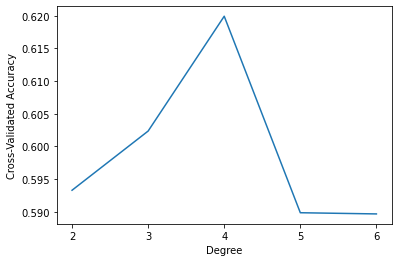

In [51]:
#Plot Cross-Validation Results for SVM
plt.plot(degree_grid, acc_scores)
plt.xticks(degree_grid)
plt.xlabel('Degree')
plt.ylabel('Cross-Validated Accuracy')

In [52]:
#Prediction on test
model_svc = SVC(kernel = 'poly', degree = 4, C = 100000).fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [53]:
#Accuracy
sum(y_pred_svc == y_test) / len(y_test) * 100

55.77689243027888

In [54]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(confusion_matrix_svc)

[[84 35]
 [76 56]]


## Strategy Implementation

#Summary of results on test data:

#Logistic Regression:           58.9641

#Random Forrest:                51.3944

#Naive Bayes Classifier:        51.7928

#Linear Discriminant Analysis:  60.1594

#Support Vector Machines:       55.7769

In [55]:
#Prediction on test
X_real = real.loc[:, ['rsi', 
                      'r_lag1', 'r_lag2', 'r_lag3', 'r_lag4', 'r_lag5',
                      'v_lag1', 'v_lag2', 'v_lag3', 'v_lag4', 'v_lag5']]
X_real

,rsi,r_lag1,r_lag2,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5
Date,,,,,,,,,,,
2019-01-02,42.127432,0.008492,-0.001242,0.008563,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469
2019-01-03,36.601730,0.001268,0.008492,-0.001242,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779
2019-01-04,46.771618,-0.024757,0.001268,0.008492,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447
2019-01-07,48.645167,0.034336,-0.024757,0.001268,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175
2019-01-08,51.220276,0.007010,0.034336,-0.024757,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,75.832040,0.000866,0.004945,0.004459,-0.000432,0.000335,-0.525801,0.734809,-0.073150,0.046003,-0.052878
2019-12-26,78.415059,-0.000195,0.000866,0.004945,0.004459,-0.000432,-0.576379,-0.525801,0.734809,-0.073150,0.046003
2019-12-27,78.431595,0.005128,-0.000195,0.000866,0.004945,0.004459,0.666497,-0.576379,-0.525801,0.734809,-0.073150


In [56]:
y_real = real.loc[:, 'trend']
y_real.head()

Date
2019-01-02    1
2019-01-03    0
2019-01-04    1
2019-01-07    1
2019-01-08    1
Name: trend, dtype: int64

In [57]:
y_pred_real = pd.Series(model_lda.predict(X_real), index = y_real.index)
y_pred_real

Date
2019-01-02    0
2019-01-03    0
2019-01-04    1
2019-01-07    0
2019-01-08    0
             ..
2019-12-24    1
2019-12-26    1
2019-12-27    1
2019-12-30    1
2019-12-31    1
Length: 252, dtype: int64

In [58]:
#Accuracy
sum(y_pred_real == y_real) / len(y_real) * 100

59.523809523809526

In [59]:
#confusion matrix for test dataset
from sklearn.metrics import confusion_matrix
confusion_matrix_real = confusion_matrix(y_real, y_pred_real)
print(confusion_matrix_real)

[[68 34]
 [68 82]]


In [60]:
real.loc[:, 'pred'] = y_pred_real
real

C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag3,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,42.127432,0.001268,0.084316,...,0.008563,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469,1,0
2019-01-03,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,36.601730,-0.024757,0.024028,...,-0.001242,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779,0,0
2019-01-04,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,46.771618,0.034336,0.102162,...,0.008492,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447,1,1
2019-01-07,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,48.645167,0.007010,-0.025799,...,0.001268,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175,1,0
2019-01-08,2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,51.220276,0.009695,-0.005282,...,-0.024757,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040,-0.000195,-0.576379,...,0.004459,-0.000432,0.000335,-0.525801,0.734809,-0.073150,0.046003,-0.052878,0,1
2019-12-26,2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059,0.005128,0.666497,...,0.004945,0.004459,-0.000432,-0.576379,-0.525801,0.734809,-0.073150,0.046003,1,1
2019-12-27,2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595,0.000034,0.124030,...,0.000866,0.004945,0.004459,0.666497,-0.576379,-0.525801,0.734809,-0.073150,1,1


In [61]:
#Balance over time
real.loc[:, 'balance'] = 0
real.head()

C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,42.127432,0.001268,0.084316,...,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469,1,0,0
2019-01-03,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,36.601730,-0.024757,0.024028,...,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779,0,0,0
2019-01-04,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,46.771618,0.034336,0.102162,...,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447,1,1,0
2019-01-07,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,48.645167,0.007010,-0.025799,...,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175,1,0,0
2019-01-08,2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,51.220276,0.009695,-0.005282,...,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153,1,0,0


In [62]:
#initial deposit : $1000
real.iloc[0, 22] = 1000
real.head()

C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,42.127432,0.001268,0.084316,...,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469,1,0,1000
2019-01-03,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,36.601730,-0.024757,0.024028,...,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779,0,0,0
2019-01-04,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,46.771618,0.034336,0.102162,...,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447,1,1,0
2019-01-07,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,48.645167,0.007010,-0.025799,...,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175,1,0,0
2019-01-08,2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,51.220276,0.009695,-0.005282,...,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153,1,0,0


In [63]:
#Trade Simulation
for i in range(1, real.shape[0]):
    if real.iloc[i, 21] == 1:
        real.iloc[i, 22] = real.iloc[i - 1, 22] * real.iloc[i, 4] / real.iloc[i, 3]
    if real.iloc[i, 21] == 0:
        real.iloc[i, 22] = real.iloc[i - 1, 22] * real.iloc[i, 3] / real.iloc[i, 4]

C:\Users\FarzadM\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [64]:
real

,Date,High,Low,Open,Close,Volume,Adj Close,rsi,d_return,volume_change,...,r_lag4,r_lag5,v_lag1,v_lag2,v_lag3,v_lag4,v_lag5,trend,pred,balance
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2019-01-02,2519.489990,2467.469971,2476.959961,2510.030029,3733160000,2510.030029,42.127432,0.001268,0.084316,...,0.049594,-0.027112,-0.070153,-0.096175,-0.032447,0.619779,-0.656469,1,0,1000.000000
2019-01-03,2019-01-03,2493.139893,2443.959961,2491.919922,2447.889893,3822860000,2447.889893,36.601730,-0.024757,0.024028,...,0.008563,0.049594,0.084316,-0.070153,-0.096175,-0.032447,0.619779,0,0,1017.986932
2019-01-04,2019-01-04,2538.070068,2474.330078,2474.330078,2531.939941,4213410000,2531.939941,46.771618,0.034336,0.102162,...,-0.001242,0.008563,0.024028,0.084316,-0.070153,-0.096175,-0.032447,1,1,1041.688737
2019-01-07,2019-01-07,2566.159912,2524.560059,2535.610107,2549.689941,4104710000,2549.689941,48.645167,0.007010,-0.025799,...,0.008492,-0.001242,0.102162,0.024028,0.084316,-0.070153,-0.096175,1,0,1035.936349
2019-01-08,2019-01-08,2579.820068,2547.560059,2568.110107,2574.409912,4083030000,2574.409912,51.220276,0.009695,-0.005282,...,0.001268,0.008492,-0.025799,0.102162,0.024028,0.084316,-0.070153,1,0,1033.401323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,75.832040,-0.000195,-0.576379,...,-0.000432,0.000335,-0.525801,0.734809,-0.073150,0.046003,-0.052878,0,1,1311.118634
2019-12-26,2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,78.415059,0.005128,0.666497,...,0.004459,-0.000432,-0.576379,-0.525801,0.734809,-0.073150,0.046003,1,1,1316.282326
2019-12-27,2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,78.431595,0.000034,0.124030,...,0.004945,0.004459,0.666497,-0.576379,-0.525801,0.734809,-0.073150,1,1,1313.359730


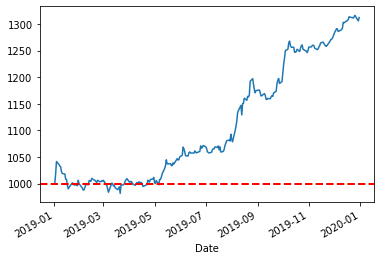

In [65]:
real.loc[:, 'balance'].plot()
plt.axhline(1000, color = 'red', linewidth = 2, linestyle = '--')

Any Suggestion for Improving the Trading Algo?

# End of the Code